In [12]:
#!/usr/bin/python
# originally by DBR 6/2016 #

%matplotlib inline  

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#upload data
prim_df = pd.DataFrame.from_csv('data/prim_df.csv')
prim_weeks = pd.DataFrame.from_csv('data/prim_weeks.csv')
ATI_df = pd.DataFrame.from_csv('data/ATI_df.csv')
ATI_weeks = pd.DataFrame.from_csv('data/ATI_weeks.csv')

#names of 8 good rebounds
ATI_list = ['Z09087','Z09106','Z09192','Z09204','Z09144','Z08214','A11200','Z09196']
off_art_indx = [65,68,68,68,65,68,71,68] #indices when ART was removed for ATI
mati=[0,1,2,4,5,6,8,9] #the indexs of the ATI monkeys in the list of 25

#colors for plotting
cz=[['darkcyan','indigo','blue', 'royalblue'], ['indianred', 'darkred', 'salmon', 'red']]

#make the color/marker lists
cz_list=[]; mz_list=[]
cind=0; tind=0;
for m in range(25):
    if prim_df.keys()[m] in ATI_list[:4]:
        mz_list.append('s')
        cz_list.append(cz[0][cind])
        cind+=1
    elif prim_df.keys()[m] in ATI_list[4:]:
        mz_list.append('>')
        cz_list.append(cz[1][tind])
        tind+=1
    else:
        mz_list.append('o')
        cz_list.append('gray')
        


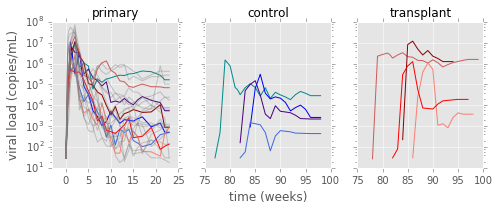

In [21]:
#plot all viral loads

fig,axarr = plt.subplots(1,3,sharey=True,figsize=(7,3),dpi=600)

nz=['primary','control','transplant']

for i in range(3):
    axarr[i].set_title(nz[i],fontsize=12)

axarr[0].set_ylabel('viral load (copies/mL)')
#axarr[0].set_xlabel('time \n (weeks post infection)')
axarr[1].set_xlabel('time (weeks)')
#axarr[2].set_xlabel('time \n (weeks post ATI)')

num_monkeys=25
prim_sp=np.zeros(num_monkeys); prim_mx=np.zeros(num_monkeys)

for m in range(num_monkeys):
    if m in mati:
        axarr[0].semilogy(prim_weeks,prim_df.iloc[:,m].interpolate(method='linear',axis=0,limit=2),color=cz_list[m],alpha=1)
    else:
        axarr[0].semilogy(prim_weeks,prim_df.iloc[:,m].interpolate(method='linear',axis=0,limit=2),color=cz_list[m],alpha=0.4)
    
    prim_mx[m] = prim_df.iloc[:,m].max()
    prim_sp[m] = 10**(np.log10(prim_df.iloc[10:22,m]).mean()) #between 6 and 21 weeks, geometric mean

ATI_sp=np.zeros(8); ATI_mx=np.zeros(8)
for i in range(8):
    
    tpts = ATI_weeks.iloc[:,i]-np.nanmin(ATI_weeks.iloc[:,i])
    setpoint_vl = ATI_df.iloc[:,i][tpts>6]
    ATI_sp[i] = 10**np.nanmean(np.log10(setpoint_vl)) #6+ weeks, geometric mean
    ATI_mx[i] = ATI_df.iloc[:,i].max() #calculating the geometric mean of setpoint post 6 weeks rebound
    
    if i<4:
        #axarr[1].scatter(ATI_weeks.iloc[:,i],ATI_df.iloc[:,i],marker=mz_list[mati[i]],color=cz_list[mati[i]])
        axarr[1].plot(ATI_weeks.iloc[:,i],ATI_df.iloc[:,i].interpolate(method='linear',axis=0,limit=2),color=cz_list[mati[i]])
    else:
        #axarr[2].scatter(ATI_weeks.iloc[:,i],ATI_df.iloc[:,i],marker=mz_list[mati[i]],color=cz_list[mati[i]])
        axarr[2].plot(ATI_weeks.iloc[:,i],ATI_df.iloc[:,i].interpolate(method='linear',axis=0,limit=2),color=cz_list[mati[i]])

axarr[0].set_xlim([-3,25])
plt.ylim([10,1e8])
plt.tight_layout()
plt.savefig('figures/data_VL.pdf')

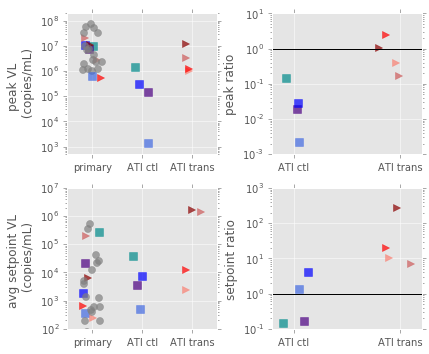

In [25]:
#compare peak viral loads
nz=0.2
alz=0.7
plt.figure(figsize=(6,5),dpi=600)

plt.subplot(221)
#peak viral loads
for j in range(num_monkeys):        
    plt.scatter(1+np.random.uniform(-nz,nz,1),prim_mx[j],color=cz_list[j],marker=mz_list[j],alpha=alz,s=50)

for i in range(4):
    plt.scatter(2+np.random.uniform(-nz,nz,1),ATI_mx[i],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)
    plt.scatter(3+np.random.uniform(-nz,nz,1),ATI_mx[i+4],color=cz_list[mati[i+4]],marker=mz_list[mati[i+4]],alpha=alz,s=50)

plt.xticks([1,2,3],['primary','ATI ctl','ATI trans'])
plt.ylabel('peak VL \n (copies/mL)')
plt.yscale('log')
plt.ylim([500,2e8])

plt.subplot(222)
for i in range(4):
    plt.scatter(1+np.random.uniform(-nz,nz,1),ATI_mx[i]/prim_mx[mati[i]],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)
    i+=4
    plt.scatter(2+np.random.uniform(-nz,nz,1),ATI_mx[i]/prim_mx[mati[i]],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)

x=np.linspace(0,3)
plt.plot(x,np.ones(len(x)),color='k')
plt.xlim([0.8,2.2])
plt.xticks([1,2],['ATI ctl','ATI trans'])
plt.ylabel('peak ratio')
plt.yscale('log')

plt.subplot(223)
#average set point viral loads
for j in range(num_monkeys):        
    plt.scatter(1+np.random.uniform(-nz,nz,1),prim_sp[j],color=cz_list[j],marker=mz_list[j],alpha=alz,s=50)

for i in range(4):
    plt.scatter(2+np.random.uniform(-nz,nz,1),ATI_sp[i],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)
    plt.scatter(3+np.random.uniform(-nz,nz,1),ATI_sp[i+4],color=cz_list[mati[i+4]],marker=mz_list[mati[i+4]],alpha=alz,s=50)

plt.xticks([1,2,3],['primary','ATI ctl','ATI trans'])
plt.ylabel('avg setpoint VL \n (copies/mL)')
plt.yscale('log')
plt.ylim([100,1e7])

plt.subplot(224)
for i in range(4):
    plt.scatter(1+np.random.uniform(-nz,nz,1),ATI_sp[i]/prim_sp[mati[i]],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)
    i+=4
    plt.scatter(2+np.random.uniform(-nz,nz,1),ATI_sp[i]/prim_sp[mati[i]],color=cz_list[mati[i]],marker=mz_list[mati[i]],alpha=alz,s=50)

x=np.linspace(0,3)
plt.plot(x,np.ones(len(x)),color='k')
plt.xlim([0.8,2.2])
plt.xticks([1,2],['ATI ctl','ATI trans'])
plt.ylabel('setpoint ratio')
plt.yscale('log')

plt.tight_layout()
plt.savefig('figures/data_stats.pdf')

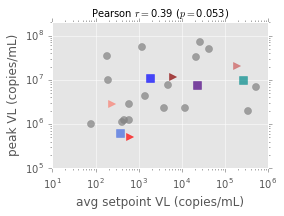

In [15]:
#correlations within single monkeys in primary

plt.figure(figsize=(4,3),dpi=600)
#average set point viral loads
for j in range(num_monkeys):        
    plt.scatter(prim_sp[j],prim_mx[j],color=cz_list[j],marker=mz_list[j],alpha=alz,s=50)
Pears_co=pearsonr(np.log10(prim_sp),np.log10(prim_mx))
    
plt.ylabel('peak VL (copies/mL)')
plt.xlabel('avg setpoint VL (copies/mL)')
plt.title('Pearson $r = $' + str(np.round(Pears_co[0],2)) + 
          ' ($p = $' + str(np.round(Pears_co[1],3)) + ')', fontsize=10)
plt.xscale('log'); plt.yscale('log'); 
plt.ylim([1e5,2e8]); plt.xlim([10,1e6]) #square axes

plt.tight_layout()
plt.savefig('figures/data_corr_pksp.pdf')  # No warning now

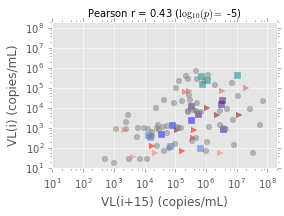

In [16]:
#plot all time point apart correlations
pt=15
alz=0.5
plt.figure(figsize=(4,3),dpi=600)
#average set point viral loads
xx=[]; yy=[]
for j in range(num_monkeys):        
    
    for i in range(3,len(prim_df.iloc[:,j])-pt):
        
        x=prim_df.iloc[i,j]
        y=prim_df.iloc[i+pt,j]
        
        if ~np.isnan(x) and ~np.isnan(y):
            xx.append(x)
            yy.append(y)
            
        plt.scatter(x,y,color=cz_list[j],marker=mz_list[j],alpha=alz,s=30)

xx=np.array(xx)
yy=np.array(yy)

Pears_co=pearsonr(np.log10(xx),np.log10(yy))
    
plt.ylabel('VL(i) (copies/mL)')
plt.xlabel('VL(i+'+str(pt)+') (copies/mL)')
plt.title('Pearson r = ' + str(np.round(Pears_co[0],2)) + 
          r' ($\log_{10}(p) =$ ' + str(np.int(np.log10(Pears_co[1]))) + ')', fontsize=10)
plt.xscale('log'); plt.yscale('log'); 
plt.ylim([10,2e8]); plt.xlim([10,2e8]) #square axes

plt.tight_layout()
plt.savefig('figures/data_corr_'+str(pt)+'pt.pdf')  # No warning now

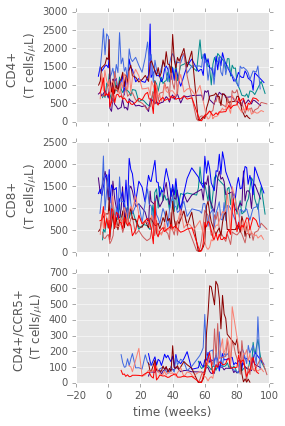

In [17]:
#T cell data from 3 cohorts in single figures

fig1,axarr = plt.subplots(3,1,sharex=True,sharey=False,figsize=(4,6),dpi=600)

for m in range(len(ATI_list)):
    
    #get T cell data
    tc=pd.read_csv('data/'+ ATI_list[m] +'.csv')
    c4=tc[tc.keys()[43]] #cd4+ all
    c8=tc[tc.keys()[44]] #cd8+
    c5=[]

    for i in range(len(tc[tc.keys()[47]])): #34 for pct
        if tc[tc.keys()[47]][i] == '-':
            c5.append(np.nan)
        else:
            c5.append(tc[tc.keys()[47]][i])
                
    if m<4:
        axarr[0].plot(tc['Weeks Post Infection'],c4,color=cz[0][m])
        axarr[1].plot(tc['Weeks Post Infection'],c8,color=cz[0][m])
        axarr[2].plot(tc[u'Weeks Post Infection'],c5,color=cz[0][m])        
    else:
        axarr[0].plot(tc['Weeks Post Infection'],c4,cz[1][m-4])
        axarr[1].plot(tc['Weeks Post Infection'],c8,cz[1][m-4])
        axarr[2].plot(tc[u'Weeks Post Infection'],c5,cz[1][m-4])

axarr[0].set_ylabel('CD4+ \n (T cells/$\mu$L)')
axarr[1].set_ylabel('CD8+ \n (T cells/$\mu$L)')
axarr[2].set_ylabel('CD4+/CCR5+ \n (T cells/$\mu$L)')

axarr[2].set_xlabel('time (weeks)')

plt.tight_layout()
plt.savefig('figures/data_Tcell.pdf')  # No warning now

/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/Users/danielreeves/anaconda/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: M

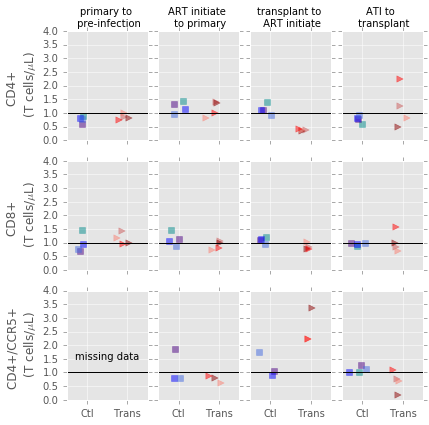

In [18]:
#T cell data from 3 cohorts in single figures

fig2,axarr2 = plt.subplots(3,4,sharex=True,sharey=True,figsize=(6,6),dpi=600)

#ind_names = ['wk 0:20 \n over wk -5:0','wk 20:55 \n over wk 0:20','wk 55:75 \n over wk 20:55','wk 75: \n over wk 55:75']
ind_names = ['primary to \n pre-infection','ART initiate \n to primary','transplant to \n ART initiate','ATI to \n transplant']
S=40
nz=0.1
alz=0.5
for k in range(len(ATI_list)):
    
    #indices of weeks
    ind_vals  = [0,6,27,47,off_art_indx[k],77]
    
    #get T cell data
    tc=pd.read_csv('data/'+ATI_list[k]+'.csv')
    c4=tc[tc.keys()[43]] #cd4+ all
    c8=tc[tc.keys()[44]] #cd8+
    c5=[]

    for i in range(len(tc[tc.keys()[47]])): #34 for pct
        if tc[tc.keys()[47]][i] == '-':
            c5.append(np.nan)
        else:
            c5.append(float(tc[tc.keys()[47]][i]))

    #plot the ratio of values over time
    for j in range(len(ind_vals)-2):
        rat4 = np.nanmean(c4[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c4[ind_vals[j]:ind_vals[j+1]]) 
        rat8 = np.nanmean(c8[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c8[ind_vals[j]:ind_vals[j+1]])
        rat5 = np.nanmean(c5[ind_vals[j+1]:ind_vals[j+2]])/np.nanmean(c5[ind_vals[j]:ind_vals[j+1]])

        if k<4:
            x=1
        else:
            x=2
            
        axarr2[0][j].scatter(x+np.random.normal(-nz,nz,1),rat4,s=S,marker=mz_list[mati[k]],color=cz_list[mati[k]],alpha=alz)
        axarr2[1][j].scatter(x+np.random.normal(-nz,nz,1),rat8,s=S,marker=mz_list[mati[k]],color=cz_list[mati[k]],alpha=alz)
        axarr2[2][j].scatter(x+np.random.normal(-nz,nz,1),rat5,s=S,marker=mz_list[mati[k]],color=cz_list[mati[k]],alpha=alz)
    
for j in range(4):
    axarr2[0][j].set_title(ind_names[j],fontsize=10)
    for i in range(3):
        axarr2[i][j].axhline(y=1,color='k')

axarr2[0][0].set_xlim([0.5,2.5])
axarr2[0][0].set_ylim([0,4])
axarr2[0][0].set_ylabel('CD4+ \n (T cells/$\mu$L)')
axarr2[1][0].set_ylabel('CD8+ \n (T cells/$\mu$L)')
axarr2[2][0].set_ylabel('CD4+/CCR5+ \n (T cells/$\mu$L)')
plt.xticks([1,2],['Ctl','Trans'])

axarr2[2][0].annotate('missing data',(0.7,1.5))
plt.tight_layout()

plt.savefig('figures/data_Tcell_ratios.pdf')  # No warning now